In [83]:
# from google.colab import drive
# drive.mount('/content/drive')

In [84]:
# !kaggle datasets download -d sakshigoyal7/credit-card-customers

In [85]:
# !unzip /content/credit-card-customers.zip -d /content/drive/MyDrive/creditcard

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

In [87]:
df = pd.read_csv('/content/drive/MyDrive/creditcard/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Preprocessing

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [89]:
remove_cols = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(remove_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Data Cleaning

In [90]:
null_counts = df.isnull().sum()
print(null_counts)

# null_cols = null_counts[null_counts > 0].index.tolist()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [91]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [92]:
y = y.map(lambda x: 0 if x == 'Existing Customer' else 1)

## Data Visualization

<Axes: >

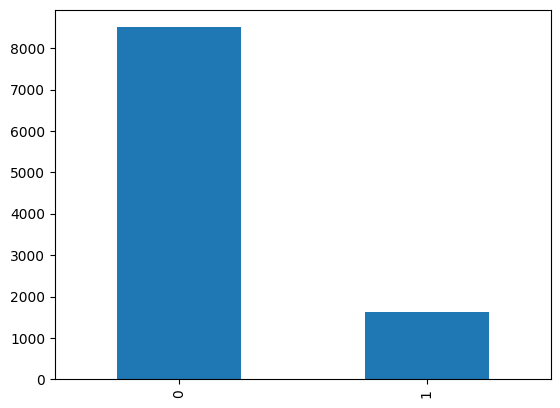

In [93]:
y_counts = y.value_counts()
y_counts.plot(kind='bar')

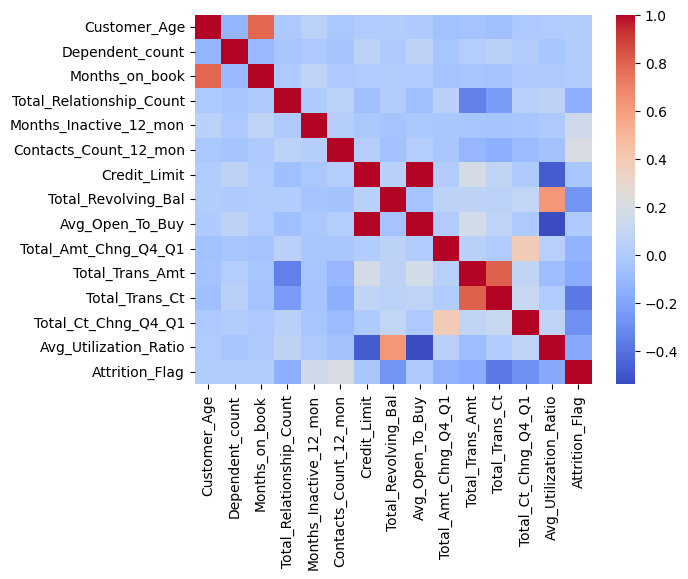

In [94]:
df = pd.concat([X, y], axis=1)
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# Data preparation pipeline

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
t = [('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_cols), ('num', StandardScaler(), numeric_cols)]
col_transform = ColumnTransformer(transformers=t)
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object'))])

In [96]:
print(categorical_cols)
print(numeric_cols)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(y, y_hat):
    accuracy = accuracy_score(y, y_hat)
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    f1 = f1_score(y, y_hat)
    return accuracy, precision, recall, f1

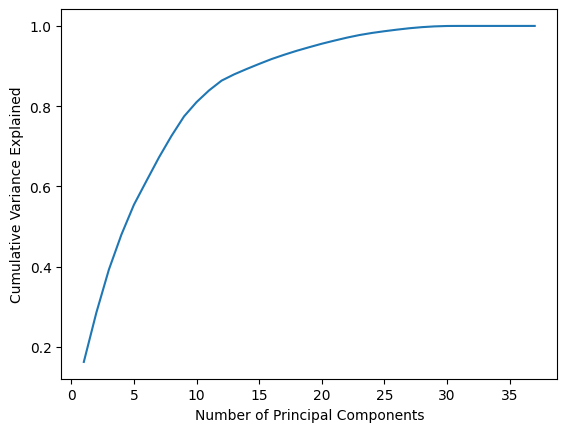

In [99]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(col_transform.fit_transform(X_train))

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance explained by each principal component
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()


In [100]:
n_pca_components = 10

## Training

In [101]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

xgb = XGBClassifier()
pca = PCA(n_components=n_pca_components)

xgb_pipe = Pipeline(steps=[('prep',col_transform), ('pca', pca), ('model',xgb)])
xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
print('Test', evaluate_model(y_pred_xgb, y_test))
print('Train', evaluate_model(xgb_pipe.predict(X_train), y_train))

Test (0.9195459032576505, 0.5815384615384616, 0.875, 0.6987060998151571)
Train (0.9950623379829651, 0.9715821812596006, 0.9976340694006309, 0.9844357976653697)


In [72]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier()

param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.5],
    'model__max_depth': [3, 5, 6],
    'model__n_estimators': [100, 150],
    'model__reg_lambda': [0.1, 1]
}
xgb_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb)])
scorer = make_scorer(recall_score)
grid_search = GridSearchCV(xgb_pipe, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring=scorer)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters:  {'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 150, 'model__reg_lambda': 0.1}
Best score:  0.8786482334869432


In [102]:
xgb_tuned = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=150, reg_lambda=.1)

xgb_tuned_pipe = Pipeline(steps=[('prep',col_transform), ('model',xgb_tuned)])
xgb_tuned_pipe.fit(X, y)
y_pred_xgb_tuned = xgb_tuned_pipe.predict(X_test)
print('xgb_tuned', evaluate_model(y_pred_xgb_tuned, y_test))

xgb_tuned (0.9995064165844028, 1.0, 0.9969325153374233, 0.9984639016897081)
0.9995064165844028


In [104]:
from joblib import dump

dump(xgb_tuned_pipe, 'creditCardChurning.pkl')

['creditCardChurning.pkl']